<a href="https://colab.research.google.com/github/helenahay/GA-python-programming/blob/main/Final%20Project%3A%20Digging%20Into%20Bachelor%20Data%2C%20HHAY%20(Dec_2021).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Digging into Bachelor Data**
##🌹 *will you accept this analysis?* 🌹

by Helena Hay, December 2021

---



# Intro
The Bachelor franchise, for those who are not familiar, is a reality TV show in which one person (the Bachelor or Bachelorette) is on a quest to "find love". The show starts with roughly 30 contestants and week by week, the Bachelor or Bachelorette eliminates contestants until the final episode where there is one contestant left. In a perfectly produced outcome, it ends in an engagement.

I find the show to be fascinating, and believe that it reflects American culture back to us viewers through a fun-house style mirror. Through this show and its long running history (19 years!) we can watch how concepts like gender norms, career popularity, beauty standards, name popularity, and race/religion importance change over time.

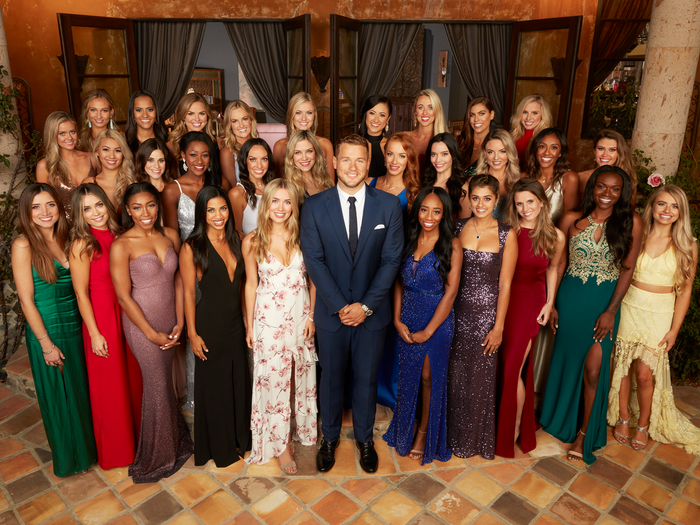

In this project, I'll be digging into a data set to explore some trends I'm curious about and questions I'd like to answer

---



#Summary

* The foundation of this data set was obtained from Dana Barnes who kindly shared the data she created and used for some very cool analysis she did on her blog, [Data Dana](https://itsdatadana.com/). I added some of my own data to it about the Leads (Religion, Race, Outcome, Relationship Status) before importing to work with.
* The data contains information about contestants up to 2018 and data about all leads up to today including but not limited to names, what season(s) they were on, profession, where they're from, religion, race and the outcome of the season and where the winning couples are now
* I focused on names, ages, religion, race, season outcome and where couples are now for my analysis

#Importing + Cleaning the Data

In [ ]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/helenahay/GA-python-programming/main/Bachelor%20Franchise%20Data.csv')

In [ ]:
# Modifying the year column to become an int instead of a float
df['Year'].fillna(0,inplace=True)
df['Year'] = df['Year'].astype(int)

In [ ]:
# I was getting a SettingWithCopyWarning and found a way to hide this in the result via https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
pd.options.mode.chained_assignment = None  

In [ ]:
df.head(10)

,Cast Type,Person ID,Lead,Season Type,Season,Year,First Name,Last Name,Age,Occupation (Raw),Occupation (Clean),Occupation Group,Week Number Eliminated,Place,Circumstance,Bachelor Pad 1,Bachelor Pad 2,Bachelor Pad 3,BiP 1,BiP 2,BiP 3,BiP 4,BiP 5,BiP 6,Bachelor Winter Games,Total Ensemble Appearances,Hometown,State,Lead Religion,Lead Race,Lead Race (simplified),How Season Ended,Relationship Status (Nov 2021)
0,Contestant,1.0,Aaron Buerge,Bachelor,Bachelor 2,2002,Amber,West,26.0,Psychologist,Psychologist,Health & Medical Professional,Week 1,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Chapel Hill,North Carolina,NaN,NaN,NaN,NaN,NaN
1,Contestant,2.0,Aaron Buerge,Bachelor,Bachelor 2,2002,Angela,NaN,27.0,Registered Nurse,Registered Nurse,Health & Medical Professional,Week 5,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Kansas City,Missouri,NaN,NaN,NaN,NaN,NaN
2,Contestant,3.0,Aaron Buerge,Bachelor,Bachelor 2,2002,Anindita,Dutta,27.0,Attorney,Attorney,Lawyers & Legal Services,Week 2,15,Quit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,New York,New York,NaN,NaN,NaN,NaN,NaN
3,Contestant,4.0,Aaron Buerge,Bachelor,Bachelor 2,2002,Brooke,Smith,22.0,College Student,College Student,Student (General),Runner-up,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Albertville,Alabama,NaN,NaN,NaN,NaN,NaN
4,Contestant,5.0,Aaron Buerge,Bachelor,Bachelor 2,2002,Camille,Langfield,29.0,Actress,Actor,Modeling & Acting,Week 1,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Los Angeles,California,NaN,NaN,NaN,NaN,NaN
5,Contestant,6.0,Aaron Buerge,Bachelor,Bachelor 2,2002,Cari,NaN,29.0,3rd Grade Teacher,3rd Grade Teacher,Teaching,Week 1,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Granite City,Illinois,NaN,NaN,NaN,NaN,NaN
6,Contestant,7.0,Aaron Buerge,Bachelor,Bachelor 2,2002,Christi,Weible,23.0,Assistant Financial Advisor,Assistant Financial Advisor,Financial Services & Investing,Week 3,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Boise,Idaho,NaN,NaN,NaN,NaN,NaN
7,Contestant,8.0,Aaron Buerge,Bachelor,Bachelor 2,2002,Christy,NaN,24.0,Radiological Technologist,Radiological Technologist,Health & Medical Professional,Week 1,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Avondale,Arizona,NaN,NaN,NaN,NaN,NaN
8,Contestant,9.0,Aaron Buerge,Bachelor,Bachelor 2,2002,Dana,Norris,24.0,Radio Sales,Radio Sales,Sales,Week 2,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Beverly Hills,California,NaN,NaN,NaN,NaN,NaN
9,Contestant,10.0,Aaron Buerge,Bachelor,Bachelor 2,2002,Erin,NaN,25.0,Publications Quality Control,Publications Quality Control,Media & Journalism,Week 2,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,West Chester,Pennsylvania,NaN,NaN,NaN,NaN,NaN




---
# Digging into the data


##Let's look at ages

What do average ages look like by role on the show?

In [ ]:
average_lead_age = df[df['Cast Type']=='Lead']['Age'].mean()
average_lead_age = int(average_lead_age)
print(f"The average age of the show lead is {average_lead_age}")

average_bachelor_age = df[(df['Cast Type']=='Lead') & (df['Season Type']=='Bachelor')]['Age'].mean()
average_bachelor_age = int(average_bachelor_age)
print(f"The average age of the Bachelor is {average_bachelor_age}")

average_bachelorette_age = df[(df['Cast Type']=='Lead') & (df['Season Type']=='Bachelorette')]['Age'].mean()
average_bachelorette_age = int(average_bachelorette_age)
print(f"The average age of the Bachelorette is {average_bachelorette_age}")

average_contestant_age = df[df['Cast Type']=='Contestant']['Age'].mean()
average_contestant_age = int(average_contestant_age)
print(f"The average age of the contestants is {average_contestant_age}")

The average age of the show lead is 30
The average age of the Bachelor is 31
The average age of the Bachelorette is 28
The average age of the contestants is 27


I'm not surprised to see that the Bachelorette is younger than the Bachelor (youth is currency for women in our society). But what is interesting to me is that the average contestant age is lower than both the average Bachelor *and* Bachelorette ages. 

Hypotheses:
1. Younger people make for better TV (drama, 'beauty')
2. Younger people are more likely to be able to take 6-9 weeks off of work
3. Younger people are hungrier for reality TV fame

### How has the age of each type of lead (Bachelor vs. Bachelorette) changed over time?

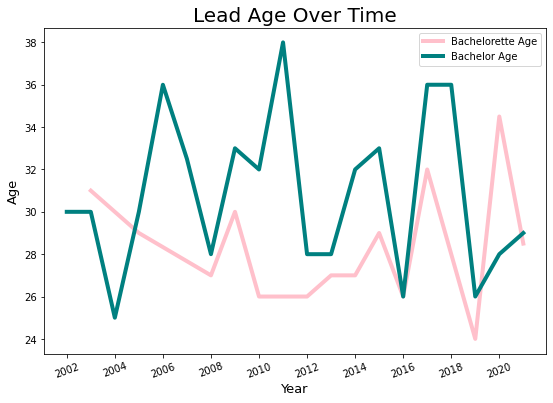

In [ ]:
leads = df[df['Cast Type']=='Lead'] # make a new df for leads, this will be used later too

bachelorettes = leads[leads['Season Type']=='Bachelorette'] # make a new df for just bachelorette lead data
bachelorettes.rename(columns={'Age':'Bachelorette Age'}, inplace=True) # rename the 'age' column to be more specific

bachelors = leads[leads['Season Type']=='Bachelor'] # make a new df for just bachelorette lead data
bachelors.rename(columns={'Age':'Bachelor Age'}, inplace=True) # rename the 'age' column to be more specific

# Visualize the Data
plt.figure(figsize=(9,6))
# Bachelorette line
bachelorettes.groupby('Year')['Bachelorette Age'].mean().plot(color='pink',
                                                              linewidth=4.0)
# Bachelor line
bachelors.groupby('Year')['Bachelor Age'].mean().plot(color='teal',
                                                      linewidth=4.0)
# Further customization with .plt
plt.title('Lead Age Over Time', fontsize=20)
plt.xlabel('Year', fontsize=13)
plt.xticks([2002,2004,2006,2008,2010,2012,2014,2016,2018,2020],
           rotation=20)
plt.ylabel('Age',fontsize=13)
plt.legend();

Lead age has varied a lot over time! From as low as 24 to as high as 38. Bachelors tend to be older, but not always. 

**Hypotheses:**
1. Production doesn't optimize for a specific age, but instead for other factors (perhaps audience likeability, maturity, or other objective factors)
2. Women skew younger because youth, especially amongst women, has caché and/or because female contestants on the Bachelor skew younger (where leads are typically sourced from)

### What about the contestants? What can we learn about casting decisions over time?

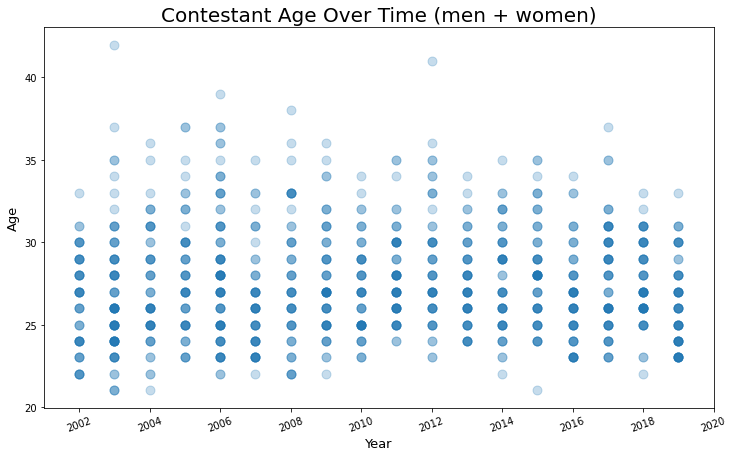

In [ ]:
# Create new df
contestants = df[df['Cast Type']=='Contestant']
contestants_ages = contestants[['Age','Year']] # make a new df that shows just contestants age and year of the show

# Visualize the data 
# via scatterplot and account for places in the data where there are multiples of the same age in a year
contestants_ages.plot.scatter(x='Year',
                              y='Age',
                              #title='Contestant Age Over Time',
                              xlim= (2001,2020),
                              s= 80,
                              alpha=.25,
                              figsize=(12,7))
plt.title('Contestant Age Over Time (men + women)', fontsize = 20)
plt.xlabel('Year', fontsize=13)
plt.xticks([2002,2004,2006,2008,2010,2012,2014,2016,2018,2020],
           rotation=20)
plt.ylabel('Age',fontsize=13);

Interesting! This seems to show that contestant ages have not only been decreasing over time, but there are fewer 'old' outliers than there used to be. 

**Hypotheses**
1. As the show has morphed from a simple reality show to find love and into a platform to become an influencer, younger people are going to the casting calls in the hopes of leveraging the show as a first step
2. Production has learned that the best drama/ratings comes from younger people who may be less mature



---

## Let's look at names and their popularity over time

### Starting with the female contestants

What has been the most popular female contestant name across the show's history?

In [ ]:
girl_names = df[(df['Season Type']=='Bachelor') & (df['Cast Type']=='Contestant')] # create a new df for girls names via two filters on the main df
girl_contestant_count = girl_names['Person ID'].count() # count of all female contestants on the show
most_popular_girl_name= girl_names['First Name'].value_counts().iloc[[0]].index[0] # create a new varible for the most popular name by indexing the new table on First Name, getting the value counts and taking the #1 item on the table
print(f"Of the {girl_contestant_count} women who have been on the show, \
the most popular female contestant name on the show is {most_popular_girl_name}")

Of the 608 women who have been on the show, the most popular female contestant name on the show is Lauren


What have been the top 10 female names?

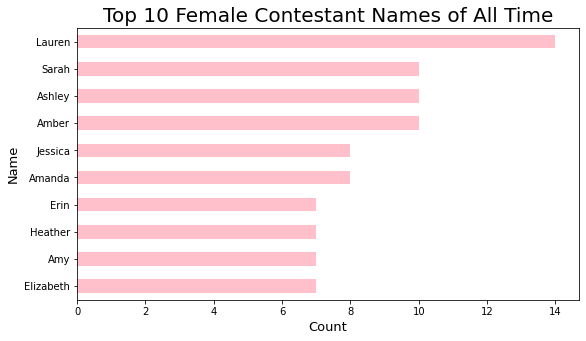

In [ ]:
girl_names['First Name'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh',
                                                                                  figsize=(9,5),
                                                                                  color='pink')
plt.title('Top 10 Female Contestant Names of All Time', fontsize=20)
plt.xlabel('Count', fontsize =13)
plt.ylabel('Name', fontsize =13);

How has the name 'Lauren' trended over time as a contestant name?

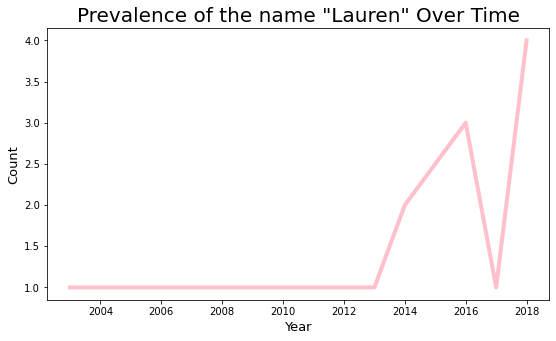

In [ ]:
lauren_data = df[(df['Season Type']=='Bachelor') & (df['Cast Type']=='Contestant')& (df['First Name']=='Lauren')]
lauren_data[['Year','First Name']].groupby('Year').count().plot(figsize=(9,5),
                                                                color='pink', 
                                                                linewidth=4.0,
                                                                legend=False)
plt.title('Prevalence of the name "Lauren" Over Time', fontsize=20)
plt.xlabel('Year', fontsize =13)
plt.ylabel('Count', fontsize =13);


### What about amongst the male contestants?

What has been the most popular male contestant name across the show's history?

*Note: the total count of men on the show is far lower than women because the Bachelorette started as a show later into the franchise's history*

In [ ]:
boy_names = df[(df['Season Type']=='Bachelorette') & (df['Cast Type']=='Contestant')] # make a new df for boy names by filtering the main df
boy_contestant_count = boy_names['Person ID'].count() # count of all female contestants on the show
most_popular_boy_name = boy_names['First Name'].value_counts().iloc[[0]].index[0] 
print(f"Of the {boy_contestant_count} men who have been on the show, \
the most popular male contestant name on the show is {most_popular_boy_name}")

Of the 396 men who have been on the show, the most popular male contestant name on the show is Chris


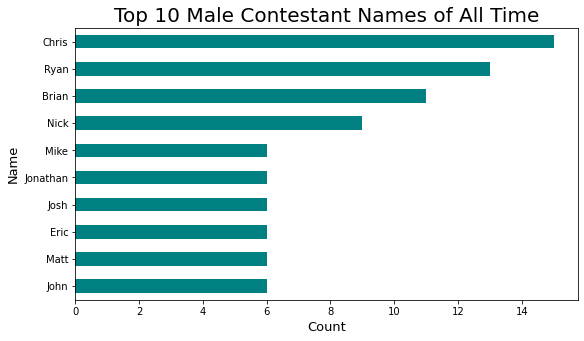

In [ ]:
boy_names['First Name'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh',
                                                                                 figsize=(9,5),
                                                                                 color='teal')
plt.title('Top 10 Male Contestant Names of All Time', fontsize=20)
plt.xlabel('Count', fontsize =13)
plt.ylabel('Name', fontsize =13);

How has the name 'Chris' trended over time as a contestant name?

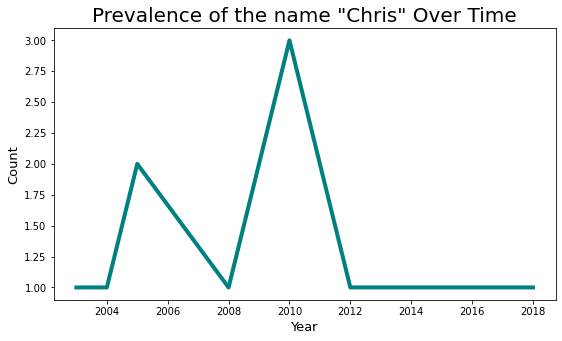

In [ ]:
chris_data = df[(df['Season Type']=='Bachelorette') & (df['Cast Type']=='Contestant')& (df['First Name']=='Chris')]
chris_data[['Year','First Name']].groupby('Year').count().plot(figsize=(9,5),
                                                                color='teal',
                                                                linewidth=4.0,
                                                                legend=False)
plt.title('Prevalence of the name "Chris" Over Time', fontsize=20)
plt.xlabel('Year', fontsize =13)
plt.ylabel('Count', fontsize =13);

Comparing all this analysis on names, we can draw some **hypotheses**
1. Given the 2010 peak of 'Chris' and then flatlining, male contestant names have become more unique as the show has aged
2. There are many duplicate names in the franchise. All the top 10 names had at least 6 instances in the franchine history, and all names are traditionally caucasian (Sarah, Ashley, Ryan, Josh, etc.) This is a clue pointing to the franchise's (very well known) lack of diversity.



---
## Let's take a look at religion and race

### What has been the religion, stated publicly, of the Bachelor and Bachelorettes over time?

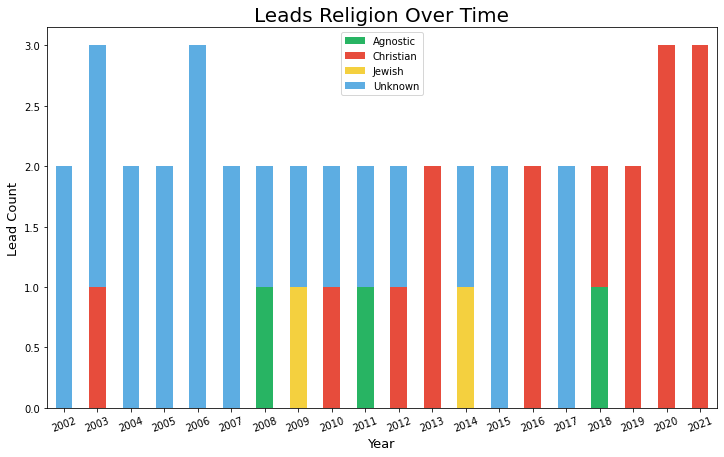

In [ ]:
# Create new df
leads_religions = leads[['Season Type','Lead Religion','Year']].sort_values('Year') # making a leads_religion df

# Visualizing the Data
colors = ["#28B463", "#E74C3C","#F4D03F","#5DADE2"] # picking specific column colors

leads_religions.pivot_table(index='Year',columns=['Lead Religion'],aggfunc='size').plot.bar(stacked=True,
                                                                                            figsize=(12,7),
                                                                                            color=colors)
plt.title('Leads Religion Over Time', fontsize=20)
plt.ylabel('Lead Count',fontsize=13)
plt.xlabel('Year', fontsize=13)
plt.xticks(rotation=20)
plt.legend();

### What about lead race over time? Specifically when thinking about BIPOC representation...

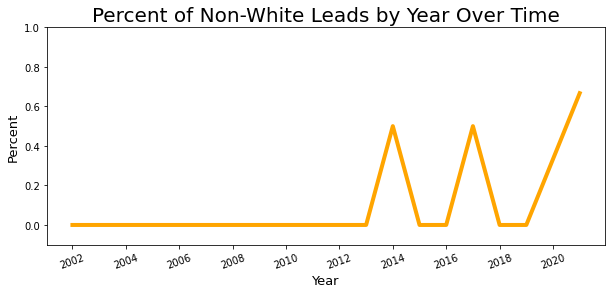

In [ ]:
# Create new df
leads_race = leads[['Lead Race (simplified)','Year']].pivot_table(index='Year',columns='Lead Race (simplified)', aggfunc='size') # pivot the leads table
leads_race.fillna(0,inplace=True) # fill the nulls with 0s

# Adding to the leads_race df
# Create new column for a sum total
sum_column = leads_race['Non-White']+leads_race['White']
leads_race['Total'] = sum_column
# Add another column for % of non-white to total 
percent_column = leads_race['Non-White'] / leads_race['Total']
leads_race['Percent Non-White'] = percent_column
leads_race.reset_index(inplace=True)

# Visualizing the Data
leads_race[['Year','Percent Non-White']].plot(figsize=(10,4),
                                              x='Year',
                                              y='Percent Non-White',
                                              ylim=(-.1,1),
                                              legend=False,
                                              linewidth=4,
                                              color ='orange')
plt.title('Percent of Non-White Leads by Year Over Time', fontsize=20)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Percent', fontsize=13)
plt.xticks([2002,2004,2006,2008,2010,2012,2014,2016,2018,2020], rotation=20);

**Insights**
1. There is a growing trend in leads being Christian, especially in the last few years
2. Either far more leads are now religious *or* more now publicly disclose their faith
3. The show didn't cast a non-white lead until the show had been on air for *12 years* 😮 
4. As christianity has increased, so has the % of non-white leads that are cast

**Hypothesis**

The franchise is making racial concessions to their more liberal viewers (who want diversity), while also appeasing conservative viewers by making christianity more of a focus. This feels particularly acute when you realize the most recent Bachelor and Bachelorette leads have both been black and both been very vocal about their christian faith. 

---
##What has been the immediate outcome of each season, and what can that tell us?





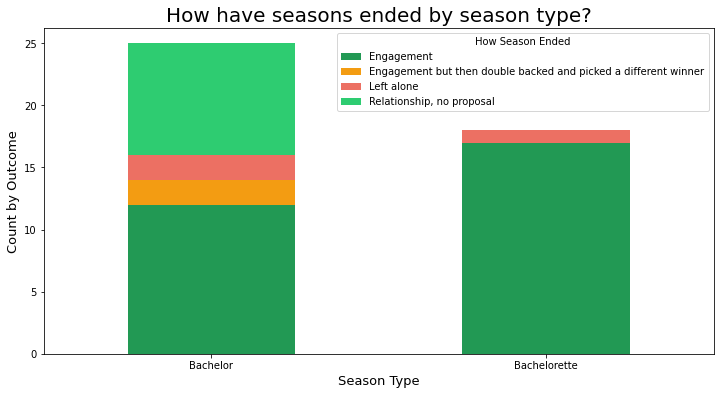

In [ ]:
# Create the df
season_end = df[['Season Type','How Season Ended']] # show just information about the season type and how it ended
season_end.dropna(subset=['How Season Ended'],axis=0,inplace=True); # drop any rows that are null 

# Visualizing the Data
season_end.pivot_table(index='Season Type', columns='How Season Ended', aggfunc='size').plot.bar(stacked=True, 
                                                                                                 figsize=(12,6), 
                                                                                                 color={'Engagement':'#229954',
                                                                                                        'Engagement but then double backed and picked a different winner':'#F39C12',
                                                                                                        'Left alone':'#EC7063',
                                                                                                        'Relationship, no proposal':'#2ECC71'})
plt.title('How have seasons ended by season type?', fontsize=20)
plt.xlabel('Season Type', fontsize=13)
plt.xticks(rotation=0)
plt.ylabel('Count by Outcome', fontsize=13);
                                                                                                
#Helpful resources
# https://stackoverflow.com/questions/48799718/pandas-pivot-table-to-stacked-bar-chart
# https://towardsdatascience.com/100-stacked-charts-in-python-6ca3e1962d2b

**Insights**
1. 50% of Bachelors actually propose to someone whereas 94% of Bachelorettes accept a proposal
2. Bachelors have often picked someone but skipped the proposal
3. A few Bachelors have even picked someone and then changed their mind soon after

**Hypotheses**
1. Bachelorettes may feel more producer pressure to uphold the expected show result of 'finding love'
2. Bachelorettes may feel more fan pressure to leave with a proposal to prove they’re not a “failure” in the eyes of the show’s formula
3. Women are better decision makers when it comes to picking a mate, and one deeper thought as to why is that zooming out to think about American culture, it is more normal for a woman to be persued by multiple suitors at once vs. the opposite. This may mean that as a simple byproduct of just being a woman in the US before coming on the show, Bachelorettes have already honed their mate-picking processes in a competitive environment.


## Ok so there are a lot of engagements💍, do people actually stay together?

What does the long term success rate look like?

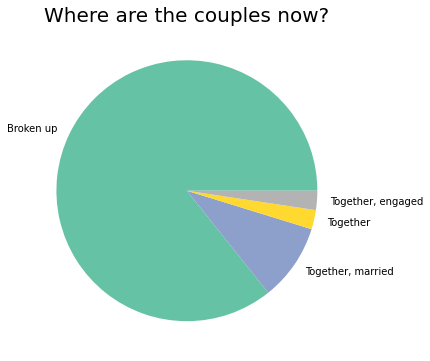

In [ ]:
df['Relationship Status (Nov 2021)'].value_counts().plot(kind='pie',
                                                         figsize=(6,6),
                                                         colormap='Set2')
plt.title('Where are the couples now?', fontsize=20)
plt.ylabel(None);

Wow! That's a lot of people not together considering the show most often ends in an engagement. Bummer. 

But maybe this looks better when we look at more recent couples? Let's see.

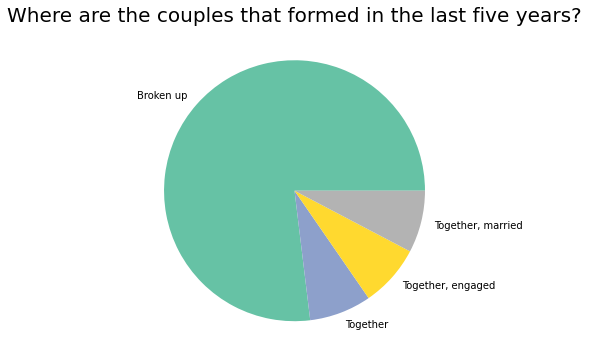

In [ ]:
df[df['Year'] >= 2016]['Relationship Status (Nov 2021)'].value_counts().plot(kind='pie',
                                                                             figsize=(6,6),
                                                                             colormap='Set2')
plt.title('Where are the couples that formed in the last five years?', fontsize=20)
plt.ylabel(None);

Nope! Even when looking at just the last five years the 'success' rate is pretty terrible. This is ~ 50% worse than the national divorce rate. Surprising? Probably not given that the show takes 6-9 weeks to film and each contestant only gets a limited amount of time with the lead.

##**And yet, as viewers we still hold out hope each season.** 🌹

# Conclusion

So to wrap up, this data set was super fun for me to look at given that I already had some of my own hypotheses about the show and got to back them up with real data. 

The TLDR takeaways of my presentation are:
1. The show has started to get more diverse while also becoming more christian
2. While the goal of the show is an engagement, only half the bachelor seasons end that way 
3. … and most people break up in a pretty short amount of time! 

My biggest challenge with this project was honestly trying to figure out how to plot the race and religion data on one chart. And realizing I did too much analysis to actually present on, lol. 

If I had more time, I would have also dug more into trends in where people are from and what industries they work in. But maybe that can be for a personal part 2 😀
